In [1]:
import json
import matplotlib.pyplot as plt


metrics_path = "/content/mnist_geometry_metrics.json"
line_loss_path = "/content/line_loss.json"


# Load geometry metrics
with open(metrics_path, "r") as f:
    metrics = json.load(f)

print("Number of geometry snapshots:", len(metrics))
print("Example entry:")
print(metrics[0])


Number of geometry snapshots: 5
Example entry:
{'epoch': 2.0, 'train_loss': 0.09844699893186469, 'test_loss': 0.09465879574790596, 'test_accuracy': 0.9696, 'grad_norm': 0.4908654520673114, 'lambda_max': 1.0435872077941895, 'directional_sharpness': -19.822850117087366, 'lgdi': 0.05122609065255581, 'stability_ratio': 0.10435872077941895}


In [2]:
# Extract lists for plotting

epochs = []
train_losses = []
test_losses = []
test_accuracies = []
grad_norms = []
lambda_max_list = []
dir_sharp_list = []
lgdi_list = []
stability_ratios = []

for entry in metrics:
    epochs.append(entry["epoch"])
    train_losses.append(entry["train_loss"])
    test_losses.append(entry["test_loss"])
    test_accuracies.append(entry["test_accuracy"])
    grad_norms.append(entry["grad_norm"])
    lambda_max_list.append(entry["lambda_max"])
    dir_sharp_list.append(entry["directional_sharpness"])
    lgdi_list.append(entry["lgdi"])
    stability_ratios.append(entry["stability_ratio"])

print("Epochs:", epochs)


Epochs: [2.0, 4.0, 6.0, 8.0, 10.0]


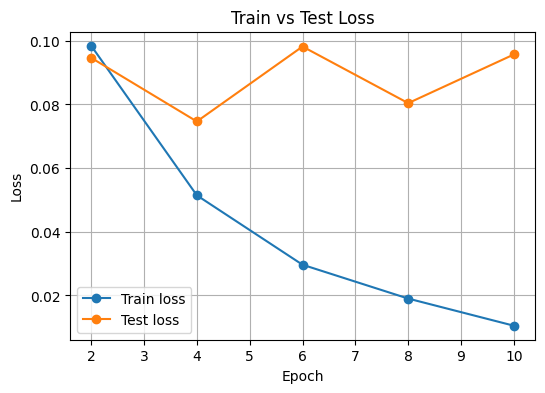

In [3]:
plt.figure(figsize=(6, 4))
plt.plot(epochs, train_losses, marker="o", label="Train loss")
plt.plot(epochs, test_losses, marker="o", label="Test loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train vs Test Loss")
plt.legend()
plt.grid(True)
plt.show()


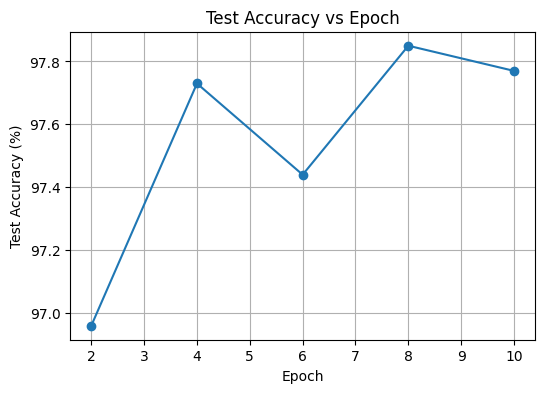

In [4]:
plt.figure(figsize=(6, 4))
plt.plot(epochs, [a * 100.0 for a in test_accuracies], marker="o")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy (%)")
plt.title("Test Accuracy vs Epoch")
plt.grid(True)
plt.show()


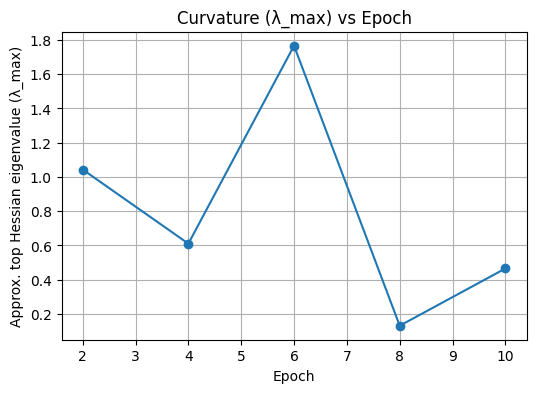

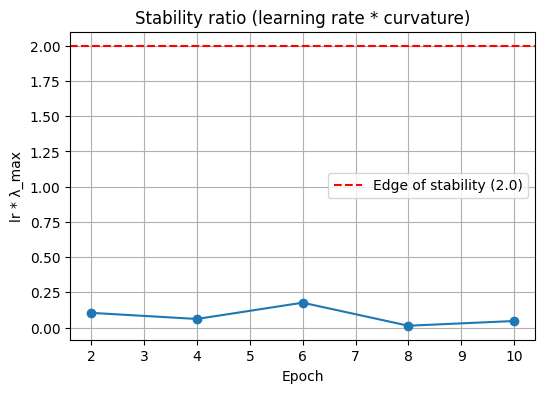

In [5]:
plt.figure(figsize=(6, 4))
plt.plot(epochs, lambda_max_list, marker="o")
plt.xlabel("Epoch")
plt.ylabel("Approx. top Hessian eigenvalue (λ_max)")
plt.title("Curvature (λ_max) vs Epoch")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(epochs, stability_ratios, marker="o")
plt.axhline(2.0, color="red", linestyle="--", label="Edge of stability (2.0)")
plt.xlabel("Epoch")
plt.ylabel("lr * λ_max")
plt.title("Stability ratio (learning rate * curvature)")
plt.legend()
plt.grid(True)
plt.show()


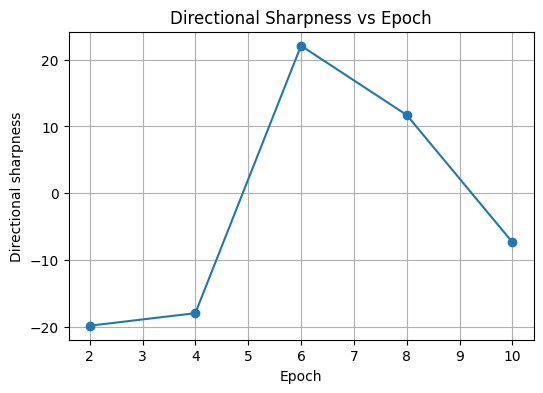

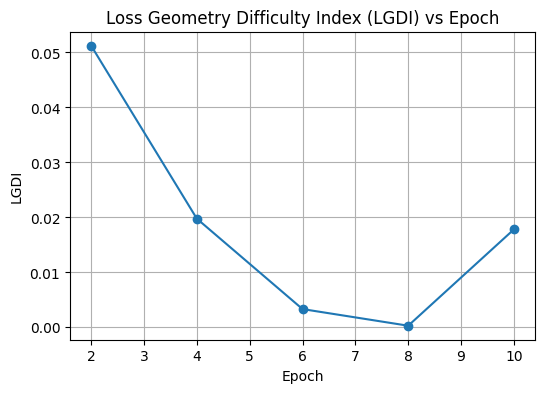

In [6]:
plt.figure(figsize=(6, 4))
plt.plot(epochs, dir_sharp_list, marker="o")
plt.xlabel("Epoch")
plt.ylabel("Directional sharpness")
plt.title("Directional Sharpness vs Epoch")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(epochs, lgdi_list, marker="o")
plt.xlabel("Epoch")
plt.ylabel("LGDI")
plt.title("Loss Geometry Difficulty Index (LGDI) vs Epoch")
plt.grid(True)
plt.show()


In [7]:
# Load 1D line loss data
with open(line_loss_path, "r") as f:
    line_data = json.load(f)

alphas = []
line_losses = []

for item in line_data:
    alphas.append(item["alpha"])
    line_losses.append(item["loss"])

print("Alphas:", alphas)
print("Losses:", line_losses)


Alphas: [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
Losses: [0.09062536656856537, 0.08570118248462677, 0.08170237988233567, 0.07848213873803615, 0.07611303329467774, 0.0742081917822361, 0.07281663864850998, 0.0716383259743452, 0.07084101624786854, 0.07046183217316866, 0.07041236534714698, 0.07075196132063866, 0.07125398740172387, 0.07207998596131801, 0.07314620465040207, 0.07447046376764774, 0.0764964058995247, 0.07903115600347518, 0.08230521269142628, 0.08627784810960293, 0.09088867083191872]


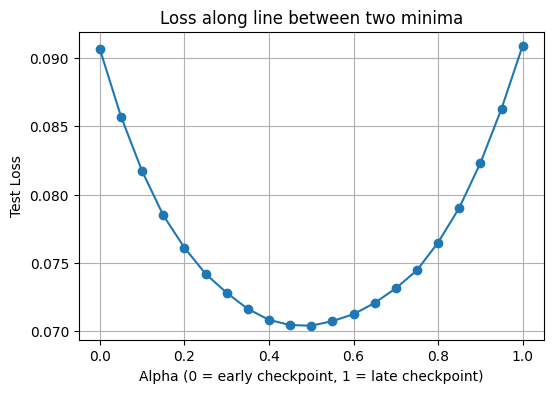

In [8]:
plt.figure(figsize=(6, 4))
plt.plot(alphas, line_losses, marker="o")
plt.xlabel("Alpha (0 = early checkpoint, 1 = late checkpoint)")
plt.ylabel("Test Loss")
plt.title("Loss along line between two minima")
plt.grid(True)
plt.show()
